In [1]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd

In [3]:
import sys
import pathlib

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
CLOUD = False

if CLOUD:
    DATA_DIR = pathlib.Path("/")
else:
    ROOT_DIR = pathlib.Path("/home/traveller/SWProj/Clients/Yandex/code-sessions/time-series/")
    DATA_DIR = ROOT_DIR.joinpath("data")

# Data loading

In [6]:
data = pd.read_csv(DATA_DIR.joinpath("gestures/UWaveGestureLibraryAll_TRAIN.tsv"),
                   sep="\t", header=None)

In [7]:
data.head()

0         1         2         3         4         5         6         7    \
0    6 -0.312502 -0.312502 -0.312502 -0.312502 -0.312502 -0.312502 -0.312502   
1    5  1.629721  1.629721  1.629721  1.629721  1.629721  1.629721  1.629721   
2    5  0.665410  0.665410  0.665410  0.665410  0.665410  0.665410  0.665410   
3    3  0.164887  0.164887  0.164887  0.164887  0.164887  0.164887  0.164887   
4    4  1.272493  1.272493  1.272493  1.272493  1.272493  1.272493  1.272493   

        8         9    ...       936       937       938       939       940  \
0 -0.312502 -0.312502  ...  0.512194  0.503002  0.492524  0.482045  0.463662   
1  1.629721  1.629721  ... -0.424252 -0.424252 -0.424252 -0.424414 -0.426015   
2  0.665410  0.665410  ... -0.856895 -0.856895 -0.856895 -0.856895 -0.856895   
3  0.164887  0.164887  ... -0.194748 -0.131015 -0.286569  0.051284  0.389136   
4  1.272493  1.272493  ...  1.852405  1.819330  1.741195  1.624052  1.506909   

        941       942       943       944       945  
0  0.445278  0.426895  0.408511  0.390129  0.371746  
1 -0.437960 -0.449905 -0.461849 -0.473794 -0.485739  
2 -0.856895 -0.856895 -0.856895 -0.856895 -0.856895  
3  0.149143  0.245672  0.437129  0.639840  0.842551  
4  1.439170  1.500978  1.618121  1.735263  1.852405  

[5 rows x 946 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Columns: 946 entries, 0 to 945
dtypes: float64(945), int64(1)
memory usage: 6.5 MB


In [9]:
COLS = ["label"] + [f"{comp}_{i}" for comp in ["x", "y", "z"] for i in range(315)]

In [10]:
data.columns = COLS

In [11]:
data.head()

label       x_0       x_1       x_2       x_3       x_4       x_5  \
0      6 -0.312502 -0.312502 -0.312502 -0.312502 -0.312502 -0.312502   
1      5  1.629721  1.629721  1.629721  1.629721  1.629721  1.629721   
2      5  0.665410  0.665410  0.665410  0.665410  0.665410  0.665410   
3      3  0.164887  0.164887  0.164887  0.164887  0.164887  0.164887   
4      4  1.272493  1.272493  1.272493  1.272493  1.272493  1.272493   

        x_6       x_7       x_8  ...     z_305     z_306     z_307     z_308  \
0 -0.312502 -0.312502 -0.312502  ...  0.512194  0.503002  0.492524  0.482045   
1  1.629721  1.629721  1.629721  ... -0.424252 -0.424252 -0.424252 -0.424414   
2  0.665410  0.665410  0.665410  ... -0.856895 -0.856895 -0.856895 -0.856895   
3  0.164887  0.164887  0.164887  ... -0.194748 -0.131015 -0.286569  0.051284   
4  1.272493  1.272493  1.272493  ...  1.852405  1.819330  1.741195  1.624052   

      z_309     z_310     z_311     z_312     z_313     z_314  
0  0.463662  0.445278  0.426895  0.408511  0.390129  0.371746  
1 -0.426015 -0.437960 -0.449905 -0.461849 -0.473794 -0.485739  
2 -0.856895 -0.856895 -0.856895 -0.856895 -0.856895 -0.856895  
3  0.389136  0.149143  0.245672  0.437129  0.639840  0.842551  
4  1.506909  1.439170  1.500978  1.618121  1.735263  1.852405  

[5 rows x 946 columns]

In [12]:
data.label.value_counts()

5    127
1    122
7    112
6    111
4    110
2    108
3    106
8    100
Name: label, dtype: int64

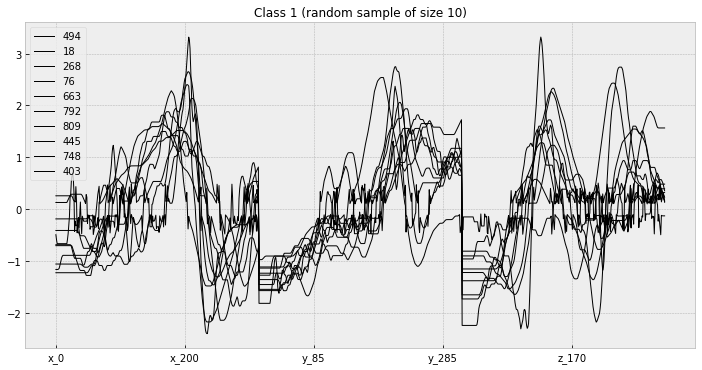

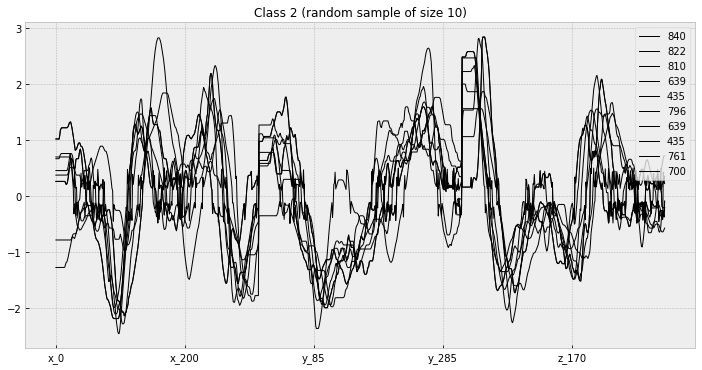

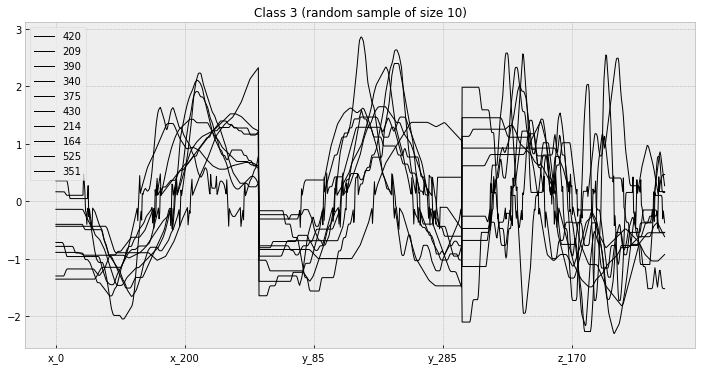

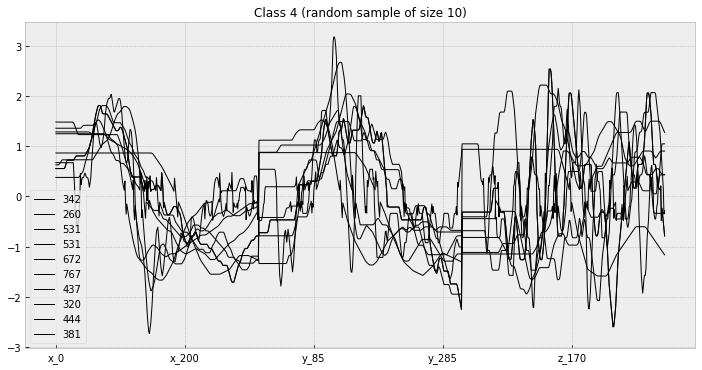

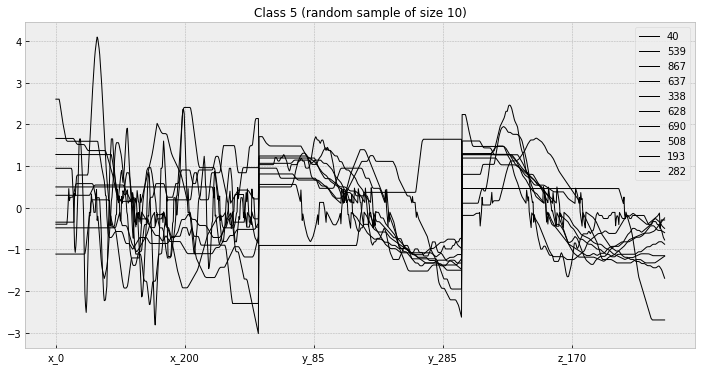

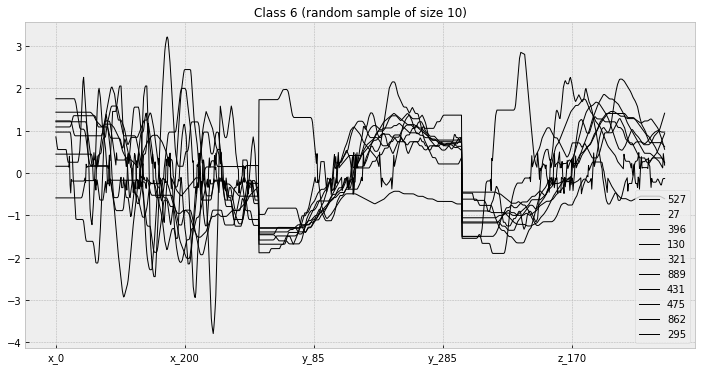

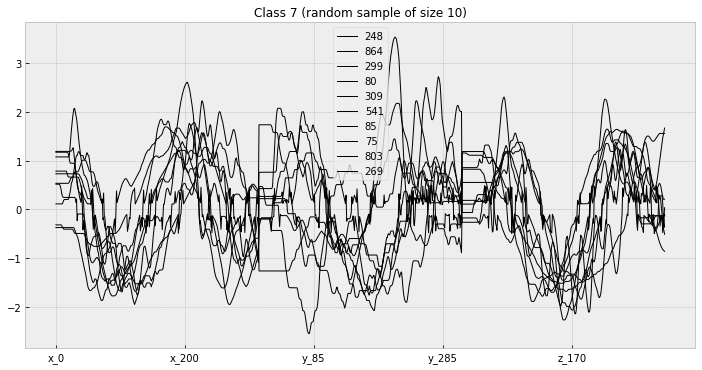

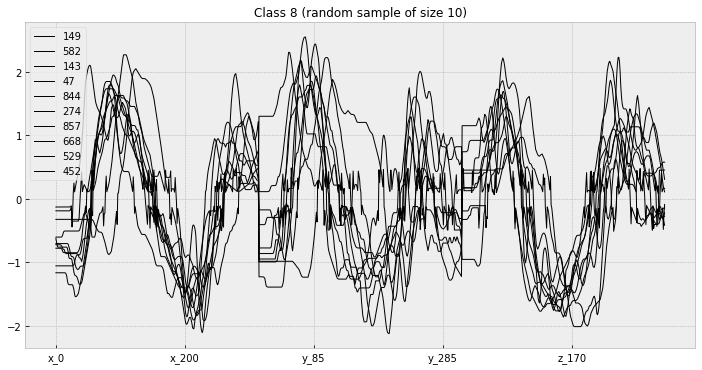

In [13]:
for i in range(1, 9):
    sample = data[data.label==i].sample(10, replace=True)

    plt.figure(figsize=(12,6))
    sample.iloc[:, 1:].transpose().plot(ax=plt.gca(), c="k", linewidth=1)
    plt.title(f"Class {i} (random sample of size 10)", fontsize=12)
    plt.show()

In [14]:
sample.iloc[:, 1:].transpose()

149       582       143       47        844       274       857  \
x_0   -0.188333 -0.322776 -1.055581 -0.602429 -0.128087 -1.164753 -0.723361   
x_1   -0.188333 -0.322776 -1.055581 -0.602429 -0.128087 -1.164753 -0.723361   
x_2   -0.188333 -0.322776 -1.055581 -0.602429 -0.128087 -1.164753 -0.723361   
x_3   -0.188333 -0.322776 -1.055581 -0.602429 -0.128087 -1.164753 -0.723361   
x_4   -0.188333 -0.322776 -1.055581 -0.602429 -0.128087 -1.164753 -0.723361   
...         ...       ...       ...       ...       ...       ...       ...   
z_310 -0.192377  0.453669  0.560860  0.579907 -0.296410  0.347668  0.112430   
z_311 -0.144468  0.453669  0.570864  0.511803 -0.309859  0.267886  0.138285   
z_312 -0.481885  0.453669  0.579062  0.443698 -0.323414  0.195249  0.162332   
z_313 -0.241876  0.453669  0.579062  0.375593 -0.368936  0.150343  0.166780   
z_314 -0.087852  0.453669  0.579062  0.307488 -0.414869  0.110444  0.166780   

            668       529       452  
x_0   -0.777403 -0.624748 -0.704393  
x_1   -0.777403 -0.684782 -0.704393  
x_2   -0.777403 -0.730246 -0.704393  
x_3   -0.777403 -0.760364 -0.704393  
x_4   -0.777403 -0.760364 -0.704393  
...         ...       ...       ...  
z_310 -0.274771 -0.173799 -0.288710  
z_311 -0.274771 -0.156533 -0.305115  
z_312 -0.274771 -0.147928 -0.301522  
z_313 -0.274771 -0.143738 -0.259674  
z_314 -0.274771 -0.143738 -0.217825  

[945 rows x 10 columns]

In [16]:
XCOLS = [cl for cl in data.columns if "x_" in cl]
YCOLS = [cl for cl in data.columns if "y_" in cl]
ZCOLS = [cl for cl in data.columns if "z_" in cl]

In [17]:
acc_data = pd.DataFrame(np.sqrt(np.square(data[XCOLS]).values
                                + np.square(data[YCOLS]).values
                                + np.square(data[ZCOLS]).values),
                        columns=[f"a_{i}" for i in range(315)])

In [18]:
data = data.join(acc_data)

In [19]:
ACOLS = [cl for cl in data.columns if "a_" in cl]

In [20]:
data.apply(["mean", "std"], axis=1)

mean       std
0    0.412290  1.164846
1    0.424717  1.156601
2    0.424112  1.156823
3    0.384336  1.165214
4    0.409532  1.158991
..        ...       ...
891  0.371257  1.169451
892  0.406487  1.154921
893  0.400158  1.158160
894  0.421007  1.166154
895  0.413399  1.160698

[896 rows x 2 columns]

In [21]:
AGGS = ["mean", "std", "median", "min", "max", "skew"]

In [22]:
features = []

for comp, cols in zip(["x", "y", "z", "a"], [XCOLS, YCOLS, ZCOLS, ACOLS]):
    features.append((data[cols]
                     .apply(AGGS, axis=1)
                     .rename(lambda cl: f"{comp}_{cl}", axis=1)))

In [23]:
features = pd.concat(features, axis=1)

In [24]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 895
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x_mean    896 non-null    float64
 1   x_std     896 non-null    float64
 2   x_median  896 non-null    float64
 3   x_min     896 non-null    float64
 4   x_max     896 non-null    float64
 5   x_skew    896 non-null    float64
 6   y_mean    896 non-null    float64
 7   y_std     896 non-null    float64
 8   y_median  896 non-null    float64
 9   y_min     896 non-null    float64
 10  y_max     896 non-null    float64
 11  y_skew    896 non-null    float64
 12  z_mean    896 non-null    float64
 13  z_std     896 non-null    float64
 14  z_median  896 non-null    float64
 15  z_min     896 non-null    float64
 16  z_max     896 non-null    float64
 17  z_skew    896 non-null    float64
 18  a_mean    896 non-null    float64
 19  a_std     896 non-null    float64
 20  a_median  896 non-null    float6

In [25]:
features.describe()

x_mean       x_std    x_median       x_min       x_max      x_skew  \
count  896.000000  896.000000  896.000000  896.000000  896.000000  896.000000   
mean     0.000205    1.001093   -0.004687   -1.827719    1.861302    0.033726   
std      0.009546    0.002093    0.282324    0.491523    0.504342    0.510727   
min     -0.059989    0.990147   -0.693738   -4.433968    0.498750   -2.086030   
25%     -0.002875    1.000178   -0.235711   -2.094983    1.528834   -0.304475   
50%      0.000044    1.000952   -0.090703   -1.743756    1.795364    0.025873   
75%      0.002748    1.001816    0.210332   -1.478950    2.094417    0.345089   
max      0.076977    1.014848    0.807331   -0.789804    4.417596    2.546233   

           y_mean       y_std    y_median       y_min  ...    z_median  \
count  896.000000  896.000000  896.000000  896.000000  ...  896.000000   
mean    -0.000250    1.000813   -0.006802   -1.653017  ...   -0.012727   
std      0.008977    0.002036    0.309300    0.421597  ...    0.291065   
min     -0.070002    0.990998   -0.757887   -4.096937  ...   -0.756247   
25%     -0.003061    0.999931   -0.261869   -1.894690  ...   -0.229796   
50%     -0.000004    1.000818   -0.086143   -1.584641  ...   -0.100647   
75%      0.002795    1.001549    0.247273   -1.369817  ...    0.222790   
max      0.040012    1.015112    0.736611   -0.721249  ...    0.724115   

            z_min       z_max      z_skew      a_mean       a_std    a_median  \
count  896.000000  896.000000  896.000000  896.000000  896.000000  896.000000   
mean    -1.688618    1.901902    0.098162    1.622905    0.583466    1.582011   
std      0.416197    0.527855    0.545537    0.055563    0.143732    0.161764   
min     -3.542302    0.461240   -1.966475    1.362020    0.226196    0.772821   
25%     -1.909754    1.539164   -0.259616    1.594041    0.477300    1.512539   
50%     -1.638847    1.813221    0.072274    1.632419    0.577142    1.609031   
75%     -1.433486    2.193290    0.438776    1.664252    0.676246    1.690326   
max     -0.555410    4.771797    2.464054    1.716340    1.070216    1.947768   

            a_min       a_max      a_skew  
count  896.000000  896.000000  896.000000  
mean     0.573272    3.044320    0.347637  
std      0.255683    0.586360    0.652606  
min      0.158346    2.045143   -1.751008  
25%      0.351468    2.666510   -0.086239  
50%      0.536253    2.926731    0.270983  
75%      0.763344    3.291100    0.706993  
max      1.352161    9.171661    4.289380  

[8 rows x 24 columns]

# Dimensionality reduction

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=5, whiten=True)
fts_pca = pca.fit_transform(features)

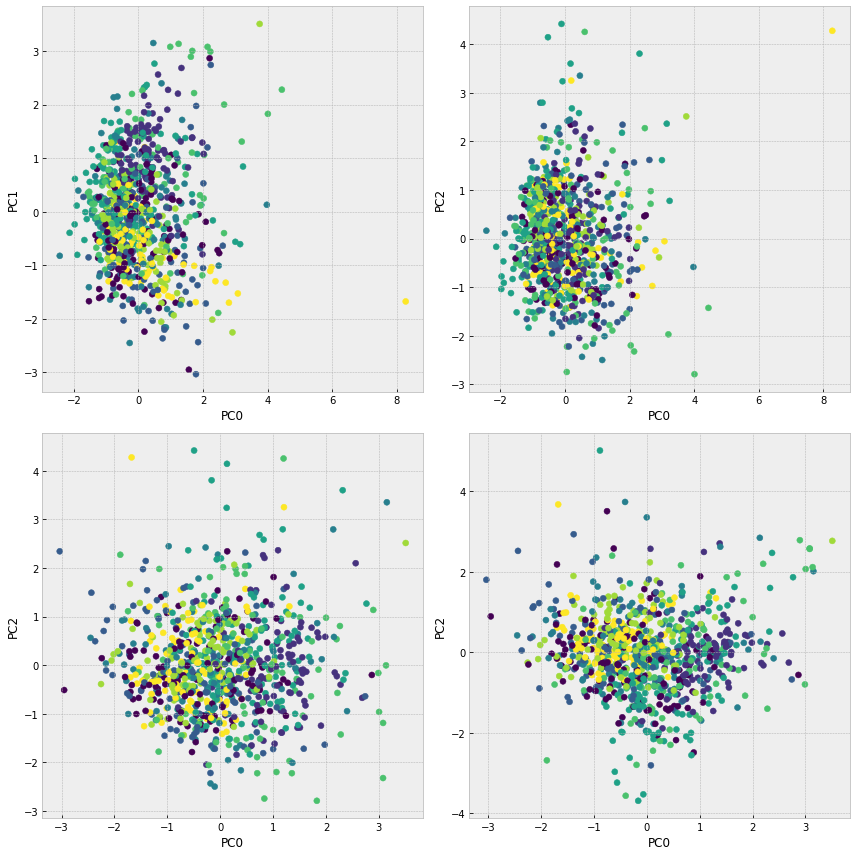

In [58]:
plt.figure(figsize=(12,12))

plt.subplot(2, 2, 1)
plt.scatter(fts_pca[:, 0], fts_pca[:, 1], c=data["label"].values)
plt.xlabel("PC0")
plt.ylabel("PC1")


plt.subplot(2, 2, 2)
plt.scatter(fts_pca[:, 0], fts_pca[:, 2], c=data["label"].values)
plt.xlabel("PC0")
plt.ylabel("PC2")

plt.subplot(2, 2, 3)
plt.scatter(fts_pca[:, 1], fts_pca[:, 2], c=data["label"].values)
plt.xlabel("PC0")
plt.ylabel("PC2")

plt.subplot(2, 2, 4)
plt.scatter(fts_pca[:, 1], fts_pca[:, 3], c=data["label"].values)
plt.xlabel("PC0")
plt.ylabel("PC2")

plt.tight_layout()

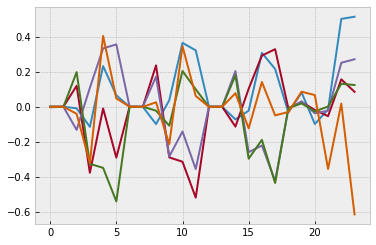

In [28]:
plt.plot(pca.components_.T)

In [61]:
features.columns

Index(['x_mean', 'x_std', 'x_median', 'x_min', 'x_max', 'x_skew', 'y_mean',
       'y_std', 'y_median', 'y_min', 'y_max', 'y_skew', 'z_mean', 'z_std',
       'z_median', 'z_min', 'z_max', 'z_skew', 'a_mean', 'a_std', 'a_median',
       'a_min', 'a_max', 'a_skew'],
      dtype='object')

Text(0, 0.5, 'x_skew')

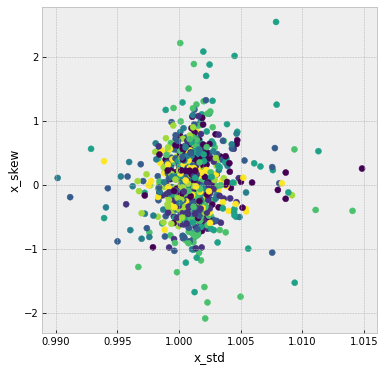

In [63]:
plt.figure(figsize=(6,6))
plt.scatter(features["x_std"], features["x_skew"], c=data["label"].values)
plt.xlabel("x_std")
plt.ylabel("x_skew")

# Spectral features

In [ ]:
np.fft.fftshift

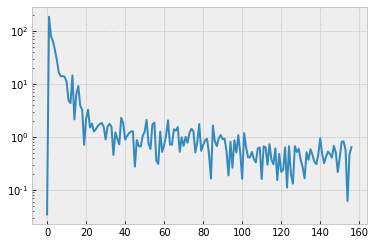

In [37]:
plt.plot(np.abs(np.fft.fft(sample.iloc[0, 1:316])[:157]))
plt.yscale("log")

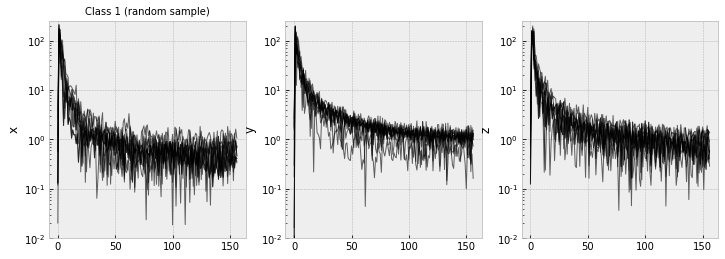

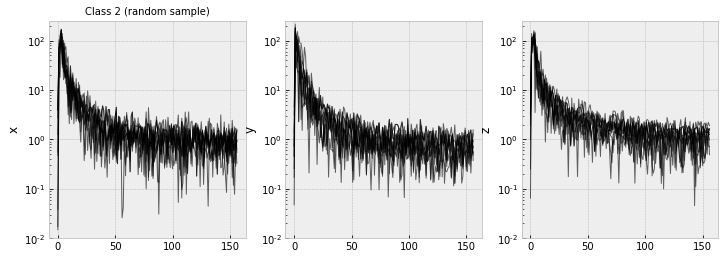

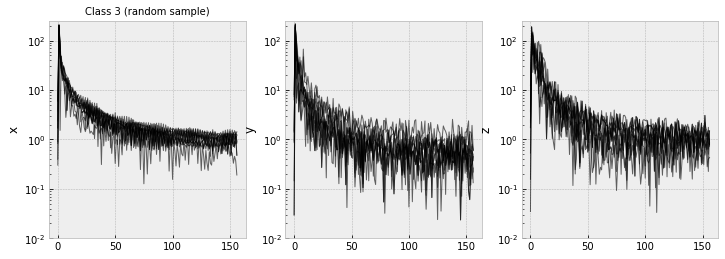

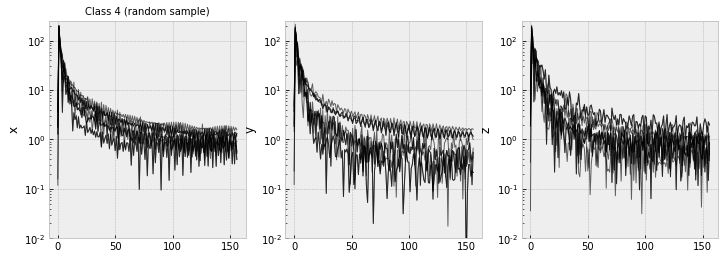

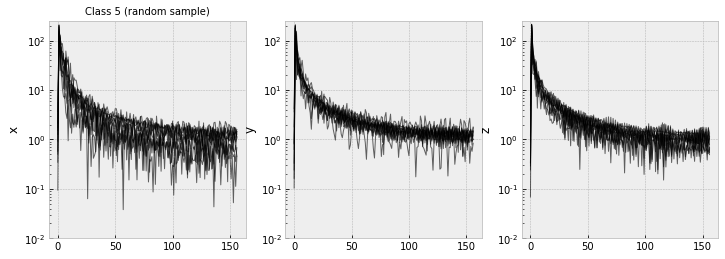

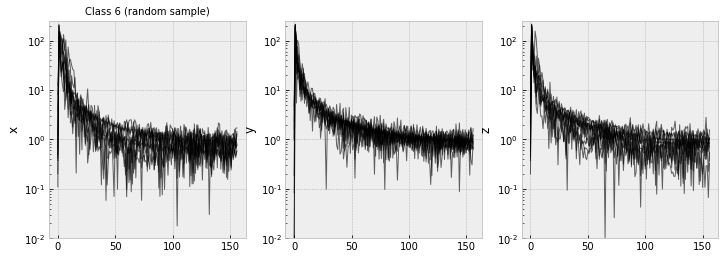

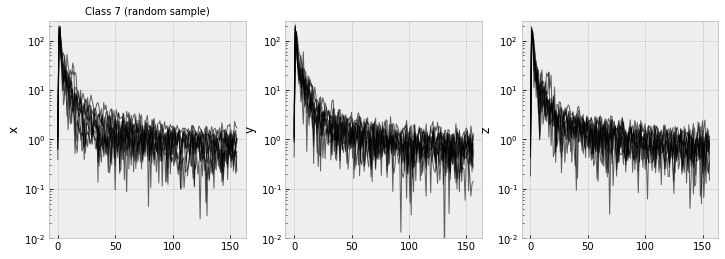

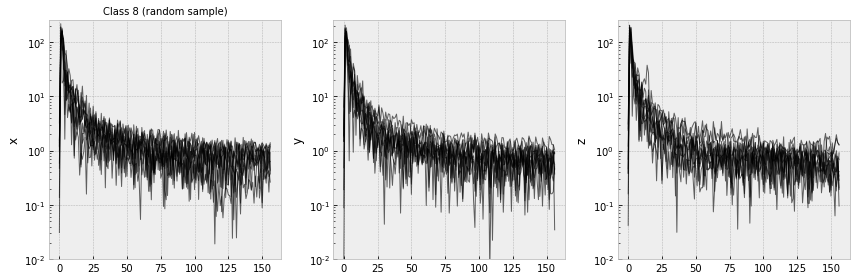

In [45]:
for i in range(1, 9):
    sample = data[data.label==i].sample(10, replace=True)

    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)

    for ri, row in sample.iterrows():
        fft_vals = np.abs(np.fft.fft(row.iloc[1:316])[:157])
        plt.plot(fft_vals, c="k", linewidth=1, alpha=0.6)
    plt.yscale("log")
    plt.ylim(0.01, 250)
    plt.ylabel("x")
    plt.title(f"Class {i} (random sample)", fontsize=10)

    plt.subplot(1,3,2)

    for ri, row in sample.iterrows():
        fft_vals = np.abs(np.fft.fft(row.iloc[316:631])[:157])
        plt.plot(fft_vals, c="k", linewidth=1, alpha=0.6)
    plt.yscale("log")
    plt.ylim(0.01, 250)
    plt.ylabel("y")
    
    plt.subplot(1,3,3)

    for ri, row in sample.iterrows():
        fft_vals = np.abs(np.fft.fft(row.iloc[631:946])[:157])
        plt.plot(fft_vals, c="k", linewidth=1, alpha=0.6)
    plt.yscale("log")
    plt.ylim(0.01, 250)
    plt.ylabel("z")
    
plt.tight_layout()

In [50]:
def get_band_power(r, n_freqs=10):
    """Calculate power in a low frequency band for each component."""
    s_x = np.abs(np.fft.fft(r[1:316]))[:157]
    s_y = np.abs(np.fft.fft(r[316:631]))[:157]
    s_z = np.abs(np.fft.fft(r[631:946]))[:157]
    s_a = np.abs(np.fft.fft(r[946:]))[:157]

    p_x = np.sum(s_x[:n_freqs]) / np.sum(s_x)
    p_y = np.sum(s_y[:n_freqs]) / np.sum(s_y)
    p_z = np.sum(s_z[:n_freqs]) / np.sum(s_z)
    p_a = np.sum(s_a[:n_freqs]) / np.sum(s_a)
    
    return pd.Series([p_x, p_y, p_z, p_a], index = ["p_x", "p_y", "p_z", "p_a"])

In [51]:
get_band_power(data.iloc[0])

p_x    0.756900
p_y    0.536070
p_z    0.588002
p_a    0.732521
dtype: float64

In [53]:
data.apply(get_band_power, axis=1)

p_x       p_y       p_z       p_a
0    0.756900  0.536070  0.588002  0.732521
1    0.575887  0.517027  0.545039  0.855260
2    0.680597  0.631347  0.595280  0.841476
3    0.705297  0.569280  0.725079  0.799944
4    0.513319  0.605512  0.527122  0.747673
..        ...       ...       ...       ...
891  0.688319  0.735605  0.684345  0.826743
892  0.631925  0.742120  0.608835  0.795301
893  0.599079  0.676812  0.726241  0.741057
894  0.673385  0.733897  0.711324  0.833636
895  0.567820  0.652679  0.652401  0.754488

[896 rows x 4 columns]

In [54]:
features_fft = _

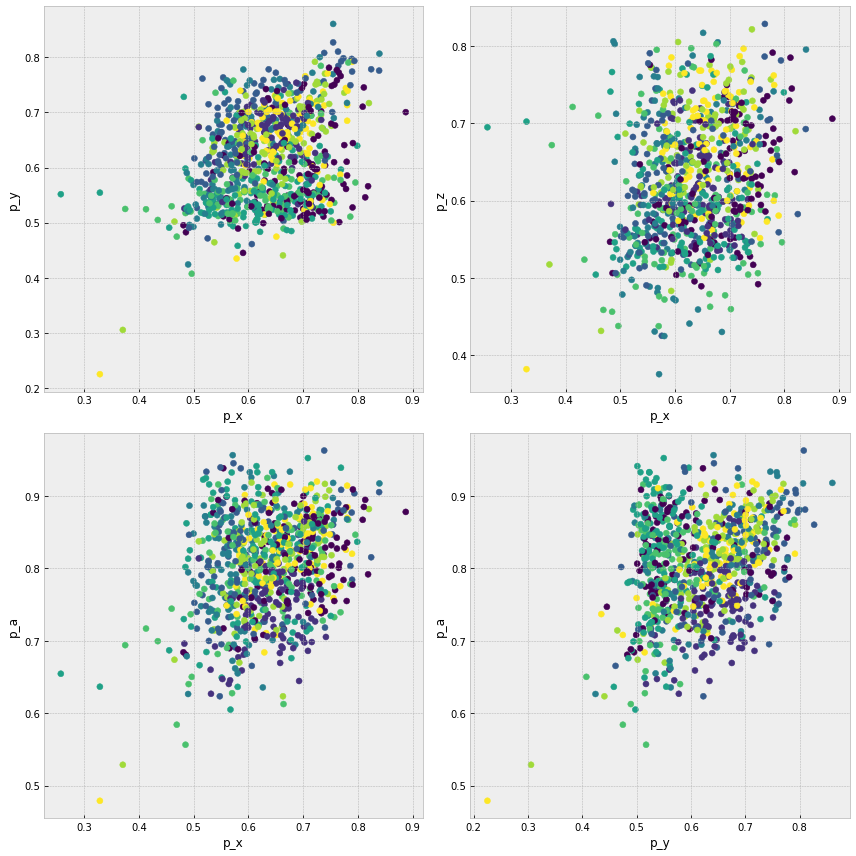

In [55]:
plt.figure(figsize=(12,12))

plt.subplot(2, 2, 1)
plt.scatter(features_fft["p_x"], features_fft["p_y"], c=data["label"].values)
plt.xlabel("p_x")
plt.ylabel("p_y")


plt.subplot(2, 2, 2)
plt.scatter(features_fft["p_x"], features_fft["p_z"], c=data["label"].values)
plt.xlabel("p_x")
plt.ylabel("p_z")

plt.subplot(2, 2, 3)
plt.scatter(features_fft["p_x"], features_fft["p_a"], c=data["label"].values)
plt.xlabel("p_x")
plt.ylabel("p_a")

plt.subplot(2, 2, 4)
plt.scatter(features_fft["p_y"], features_fft["p_a"], c=data["label"].values)
plt.xlabel("p_y")
plt.ylabel("p_a")

plt.tight_layout()

# Tranforming signals to images

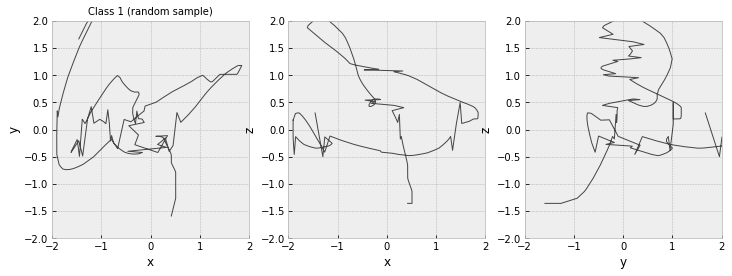

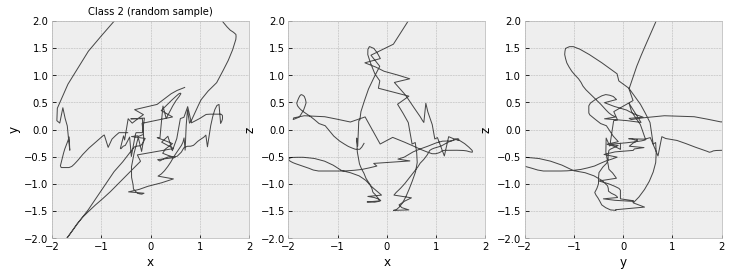

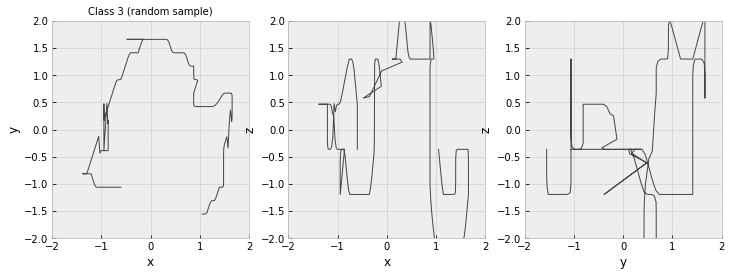

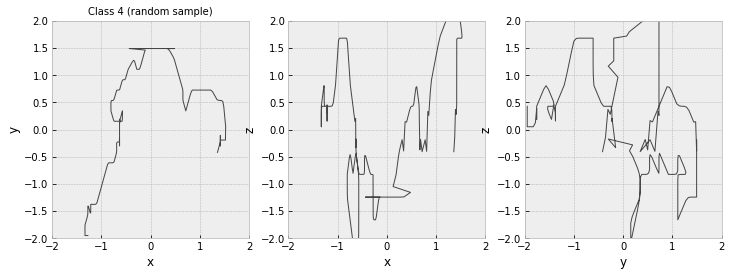

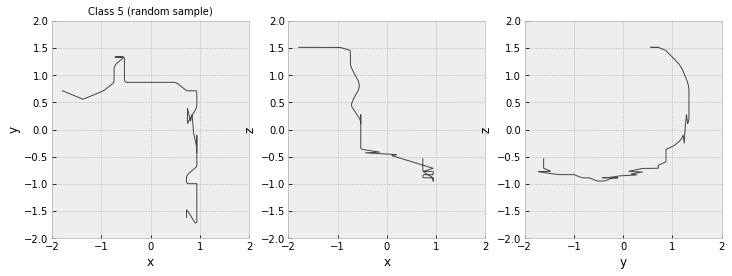

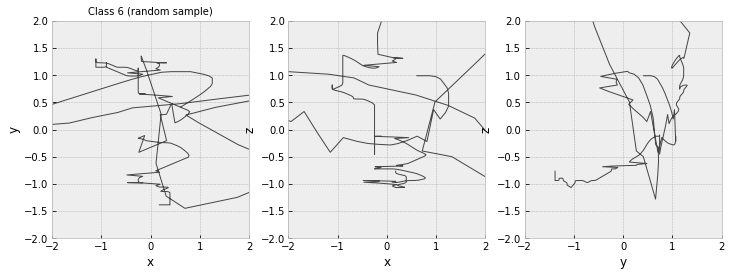

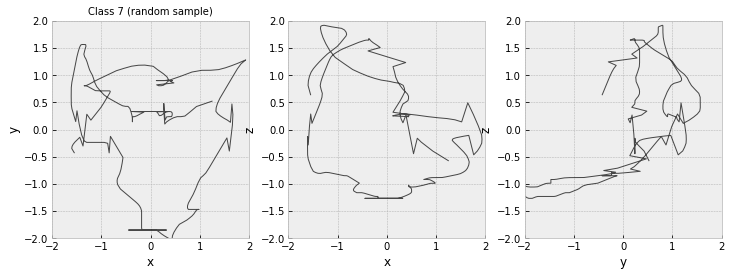

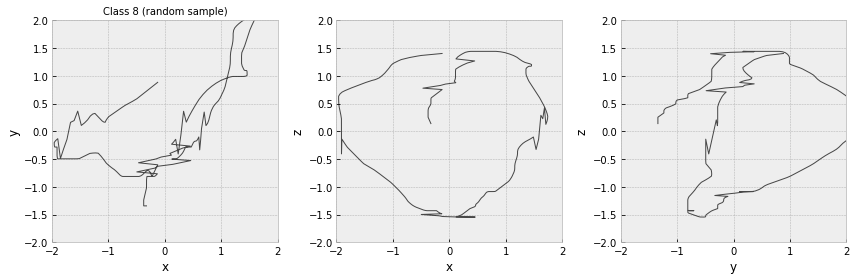

In [60]:
for i in range(1, 9):
    sample = data[data.label==i].sample(1, replace=True)

    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)

    for ri, row in sample.iterrows():
        plt.plot(row.iloc[1:316], row.iloc[316:631],
                 linewidth=1, alpha=0.7, c="k")
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Class {i} (random sample)", fontsize=10)

    plt.subplot(1,3,2)

    for ri, row in sample.iterrows():
        plt.plot(row.iloc[1:316], row.iloc[631:946],
                 linewidth=1, alpha=0.7, c="k")
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.xlabel("x")
    plt.ylabel("z")
    
    plt.subplot(1,3,3)

    for ri, row in sample.iterrows():
        plt.plot(row.iloc[316:631], row.iloc[631:946],
                 linewidth=1, alpha=0.7, c="k")
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.xlabel("y")
    plt.ylabel("z")
    
plt.tight_layout()